In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
#set parameters ==================================
deg_theta = np.arange(1.,90.) #sensor zenith angle
deg_theta_s = 20. #solar zenith angle
deg_phi = 30. #sensor azimuth angle
deg_phi_s = 10. #solar azimuth angle
Q_orig = 0.5
U_orig = 0.1
#=================================================

#convert to radians
theta = deg_theta * np.pi / 180.
theta_s = deg_theta_s * np.pi / 180.
phi = deg_phi * np.pi / 180.
phi_s = deg_phi_s * np.pi / 180.

#scattering angle like in L1C (Hovenier 1969 eq 7)
u = np.cos(theta+np.pi)
u_s = np.cos(theta_s)
alpha = np.arccos( u*u_s + np.sqrt((1-u**2)) * np.sqrt((1-u_s**2)) * np.cos(phi + np.pi - phi_s) )

#scattering angle like in Gordon
cos_phirel = -1.0*np.cos(phi - phi_s)
alpha_HG = np.arccos(np.sin(theta)*np.sin(theta_s)*cos_phirel - np.cos(theta)*np.cos(theta_s))

#rotation angle like in L1C (Hovenier 1969 eq 7)
if (deg_phi-deg_phi_s) <= 0:
    denom_sign = -1.0
else:
    denom_sign = 1.0    
sigma = np.arccos( (u*np.cos(alpha) - u_s) / 
                  (denom_sign*np.sqrt(1-np.cos(alpha)**2)*np.sqrt(1-u**2) ) )    
#sigma2 = np.arccos( (u*np.cos(alpha) - u_s) / 
#                  (denom_sign*np.sin(alpha)*np.sqrt(1-u**2) ) )    

#rotation angle like in SPEXone processing: (Hansen and Travis 1974 eq 3.16) i_2
if (deg_phi+180.-deg_phi_s) <= 0:
    sigma2 =np.pi- ( np.arccos( (u_s*np.sqrt(1.0-u**2) - u*np.sqrt(1-u_s**2)*np.cos(phi + np.pi - phi_s)) 
                   / (np.sqrt(1.0-np.cos(alpha)**2)) )   )  
else:
    sigma2 =(( np.arccos( (u_s*np.sqrt(1.0-u**2) - u*np.sqrt(1-u_s**2)*np.cos(phi + np.pi - phi_s)) 
                   / (np.sqrt(1.0-np.cos(alpha)**2)) )   )  )



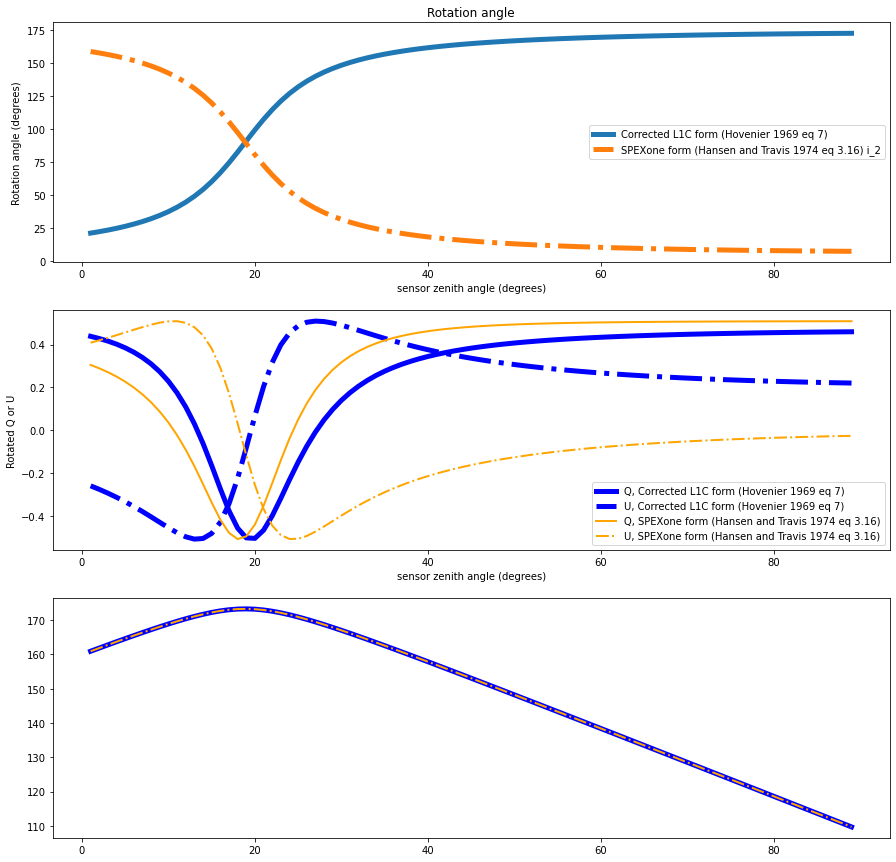

In [44]:

#plot rotation angle figure
fig, ax = plt.subplots(3,figsize=(15,15))
ax[0].plot(deg_theta, sigma*180./np.pi, label='Corrected L1C form (Hovenier 1969 eq 7)',linewidth=5.0)
ax[0].plot(deg_theta, sigma2*180./np.pi,'-.', label='SPEXone form (Hansen and Travis 1974 eq 3.16) i_2',linewidth=5.0)
ax[0].set_title('Rotation angle')
ax[0].set_xlabel('sensor zenith angle (degrees)')
ax[0].set_ylabel('Rotation angle (degrees)')
ax[0].legend()

#calculated rotation 
Q_rot = Q_orig*np.cos(2.0*sigma) + U_orig*np.sin(2.0*sigma)
U_rot = -1.0*Q_orig*np.sin(2.0*sigma) + U_orig*np.cos(2.0*sigma)

Q_rot3 = Q_orig*np.cos(2.0*sigma2) + U_orig*np.sin(2.0*sigma2)
U_rot3 = -1.0*Q_orig*np.sin(2.0*sigma2) + U_orig*np.cos(2.0*sigma2)

#plot rotated Q & U
ax[1].plot(deg_theta, Q_rot, label='Q, Corrected L1C form (Hovenier 1969 eq 7)',linewidth=5.0,color='Blue')
ax[1].plot(deg_theta, U_rot,'-.', label='U, Corrected L1C form (Hovenier 1969 eq 7)',linewidth=5.0,color='Blue')
ax[1].plot(deg_theta, Q_rot3, label='Q, SPEXone form (Hansen and Travis 1974 eq 3.16)',linewidth=2.0,color='Orange')
ax[1].plot(deg_theta, U_rot3,'-.', label='U, SPEXone form (Hansen and Travis 1974 eq 3.16)',linewidth=2.0,color='Orange')
ax[1].set_xlabel('sensor zenith angle (degrees)')
ax[1].set_ylabel('Rotated Q or U')
ax[1].legend()

#plot rotated Q & U
ax[2].plot(deg_theta, alpha*180./np.pi, label='Scattering angle (Hovenier 1969 eq 7)',linewidth=5.0,color='Blue')
ax[2].plot(deg_theta, alpha_HG*180./np.pi,'-.', label='Scattering angle (Gordon)',linewidth=2.0,color='Orange')

